In [28]:
import pandas as pd 
import numpy as np
import torchvision
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pylab as plt
import sklearn 
from sklearn import linear_model as lm
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from tensorflow.keras.utils import set_random_seed
from sklearn.preprocessing import OneHotEncoder 
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras.optimizers import SGD
from tensorflow import keras 
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Input,Concatenate
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy 


In [29]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive'
os.chdir(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Data download and preprocessing
DOWNLOAD_MNIST = True # If already download, set as False 
train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, # this is training data
                                        # transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST)
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)
# change the features to numpy
X_train = train_data.train_data.numpy() 
X_test = test_data.test_data.numpy()
# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

In [3]:
# reshape dataset to have a single channel
trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
testX = X_test.reshape((X_test.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(Y_train)
testY = to_categorical(Y_test)

# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
trainX = train_norm / 255.0
testX = test_norm / 255.0

## 5a

In [4]:
seed_range = 6
epoch = 10 

In [5]:
def bestcnn(seed):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3,3), 
                   activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation='softmax'))
	# compile model
  np.random.seed(seed)
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, 
                loss=losses.CategoricalCrossentropy(), 
                metrics=['accuracy'])
  return model



In [ ]:
def savemodel(seed_range,epoch):
    for i in range(0, seed_range):
      set_random_seed(i)
      model = bestcnn(i)
      model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=10, 
                    batch_size=128,
                    verbose=0)
      model.save('model%d.h5'%(i))


In [ ]:
def savehistory(seed_range,epoch):
    for i in range(0, seed_range):
      set_random_seed(i)
      model = bestcnn(i)
      model = model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=10, 
                    batch_size=128,
                    verbose=0)
      np.save('history%d.npy'%(i),model.history)


In [ ]:
'''
#save model
savehistory(6,10)
'''

In [ ]:
'''
#save model
savemodel(seed_range,epoch)
'''

### cross-entropy error plots

In [10]:
def cross_plot(history,seed):
    # CrossEntropy Plot
    plt.plot(history['loss'], color='b', label="Training loss")
    plt.plot(history['val_loss'], color='r', label="validation loss")
    best_epoch = history['val_loss'].index(min(history['val_loss']))
    plt.axvline(best_epoch, color='m', label='Best epoch')
    plt.xlabel('epoch')
    plt.ylabel('average CrossEntropy')
    plt.title('Cross-entropy Error using seed=%d'%(seed))
    plt.legend(['Training loss','Validation loss'],loc='best')
    plt.show()


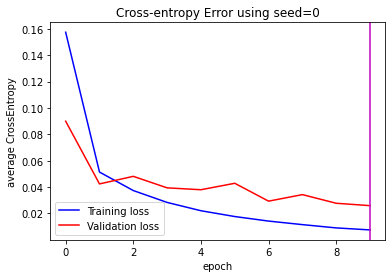

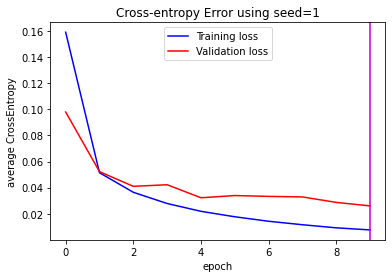

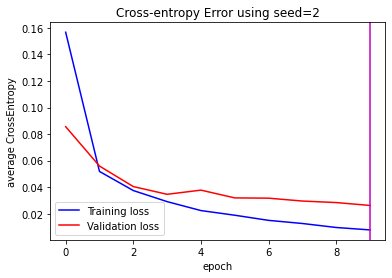

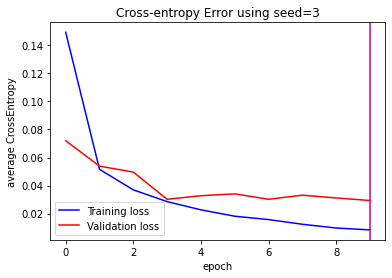

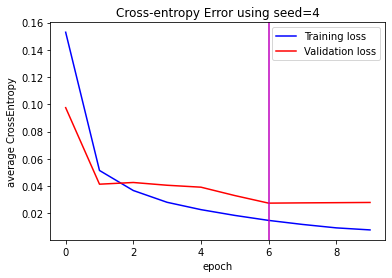

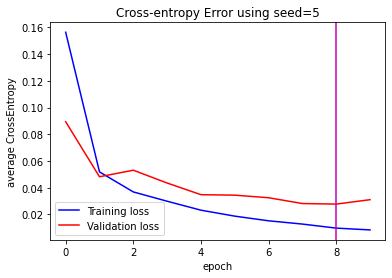

In [11]:
for i in range(0, 6):
  history = np.load('history%d.npy'%(i),allow_pickle='TRUE').item()
  cross_plot(history,i)

# 5b

In [12]:
def mis_error_plot(history,seed,epoch):
  x = np.repeat(1,epoch)
  # Missclassification error Plot
  plt.plot((x - history['accuracy'])*100, color='b', label="training loss")
  plt.plot((x-history['val_accuracy'])*100, color='r', label="validation loss")
  best_epoch = history['val_accuracy'].index(max(history['val_accuracy']))
  plt.axvline(best_epoch, color='m', label='Best epoch')
  plt.xlabel('epoch')
  plt.ylabel('mis-classification error')
  plt.title('Mis-classification error using seed=%d'%(seed))
  plt.legend(['Training set','Validation set'],loc='best')
  plt.show()

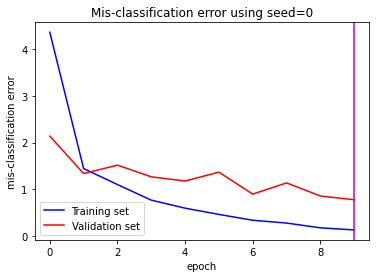

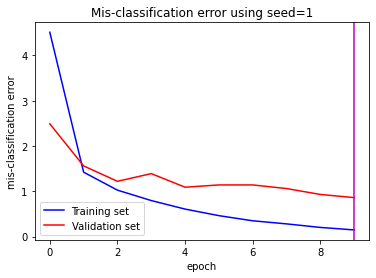

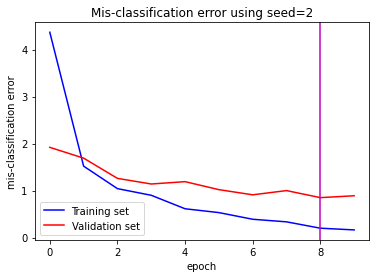

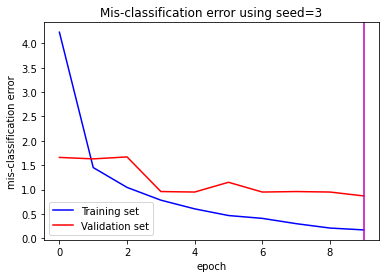

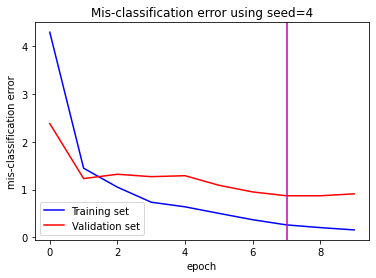

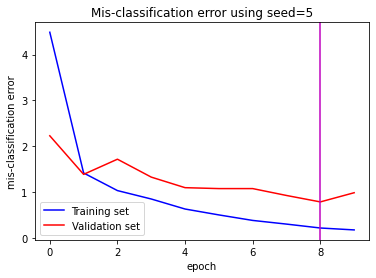

In [13]:
for i in range(0, 6):
  set_random_seed(i)
  history = np.load('history%d.npy'%(i),allow_pickle='TRUE').item()
  mis_error_plot(history,i,epoch)

# 5c

In [88]:
def acc(seed):
  max_accu = []
  for i in range(0, seed):
    history = np.load('history%d.npy'%(i),allow_pickle='TRUE').item()
    max_accu.append( max(history['val_accuracy']))
  return max_accu

In [89]:
acc(6)


[0.9922000169754028,
 0.9914000034332275,
 0.9915000200271606,
 0.9912999868392944,
 0.9912999868392944,
 0.9921000003814697]

In [91]:
acc(6).index(max(acc(6)))

0

When seed is 0, the model has the highest accuracy

In [14]:
model0 = load_model('model0.h5')

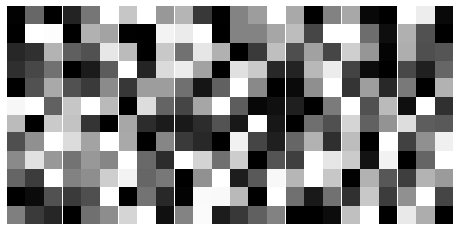

In [27]:
params = model0.layers[0].get_weights()[0].T
plt.figure(figsize=(8, 4))
for i in range(params.shape[0]):
    plt.subplot(4, 8, i + 1) 
    im = params[i,:]
    im =  im.reshape((3,3))
    plt.imshow( im, cmap = "gray", interpolation = "nearest")
    plt.axis("off")

plt.subplots_adjust(wspace=0, hspace=0)

In [25]:
model0.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_18 (Dense)            (None, 100)              

In [20]:
model0.layers[-1]

# 5d

In [35]:
set_random_seed(0)

In [36]:
lr = [0.1,0.01,0.2,0.5]
momentum = [0.0, 0.5, 0.9]
set_random_seed(3)

In [37]:
def bestcnntune(lr, momentum):
    for i in lr:
      for j in momentum:
        opt = SGD(learning_rate=i, momentum=j)
        model = Sequential()
        model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(100, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dense(10, activation='softmax'))
        model.compile(optimizer=opt, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])
        model = model.fit(trainX, trainY, 
                    validation_data=(testX, testY), 
                    epochs=10, 
                    batch_size=128,
                    verbose=0)

        np.save('test_lr:'+str(i)+'m:' + str(j)+'.npy',model.history)


In [ ]:
'''
# save model
bestcnntune(lr, momentum)
'''

In [33]:
model_name = 'CNN'

In [46]:
def plot_history(history, model_name):
  best_epoch = history['val_accuracy'].index(max(history['val_accuracy']))
  fig, ax = plt.subplots(figsize=(12,5))
  plt.title(' '.join([model_name, 'model learning curve - Max accuracy on test is %1.4f' % max(history['val_accuracy'])]))
  ax.set_xlabel('Epochs')
  ax.set_xticks(range(epoch),10)
  ax.set_ylabel('Loss')
  ax.plot(range(epoch), history['loss'], 'r', label='Train cross entropy')
  ax.plot(range(epoch), history['val_loss'], 'orange', label='Test cross entropy')
  ax.axvline(best_epoch, color='m', lw=4, alpha=0.5, label='Best epoch')
  x = np.repeat(1,epoch)
  ax.plot(range(epoch), x-history['accuracy'], 'g', label='Train miss-classiﬁcation error')
  ax.plot(range(epoch), x-history['val_accuracy'], 'b', label='Test miss-classiﬁcation error')
  ax.legend()
  plt.show()

lr:  0.1 & momentum:  0.0


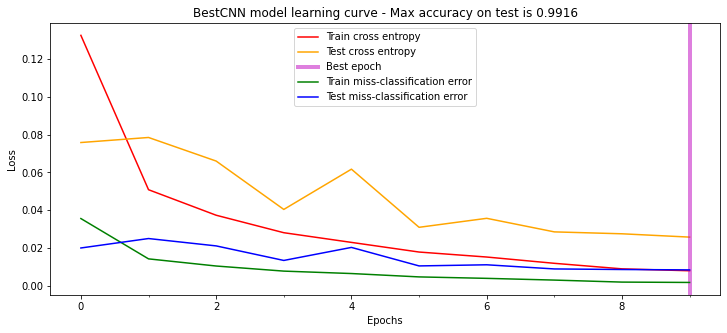

lr:  0.1 & momentum:  0.5


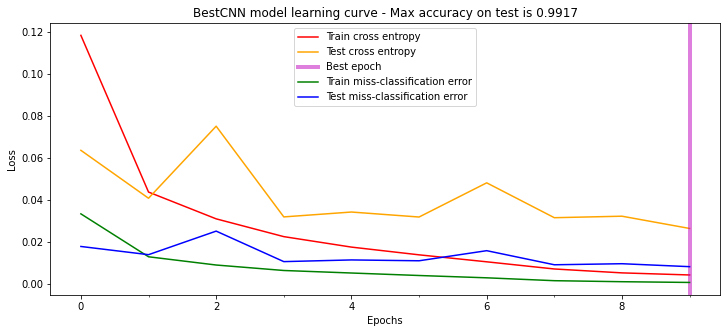

lr:  0.1 & momentum:  0.9


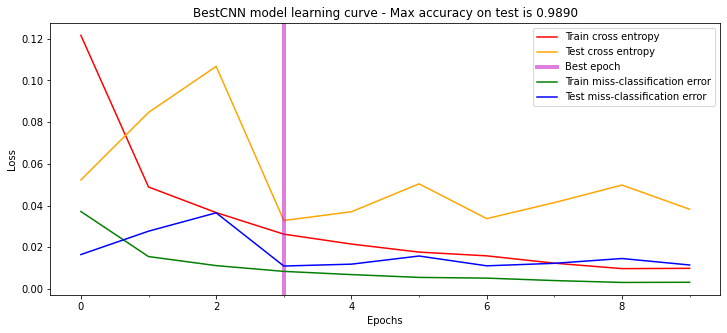

lr:  0.01 & momentum:  0.0


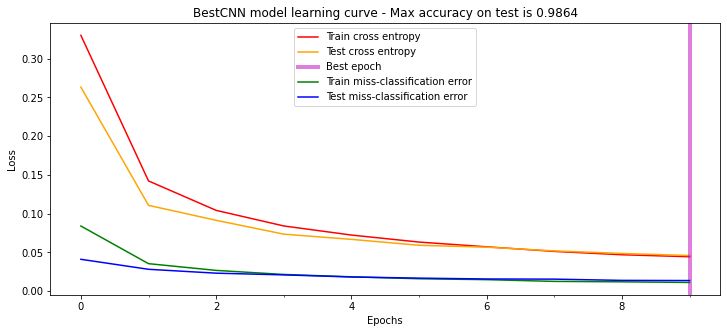

lr:  0.01 & momentum:  0.5


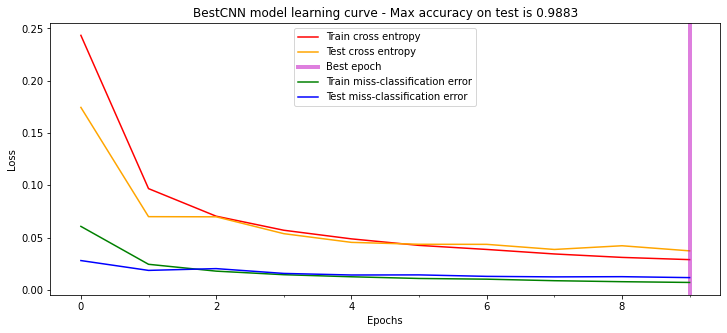

lr:  0.01 & momentum:  0.9


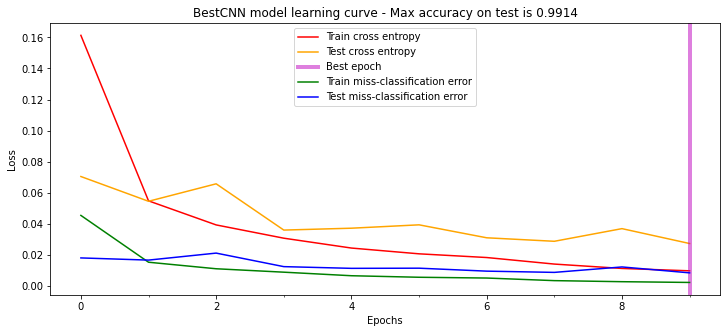

lr:  0.2 & momentum:  0.0


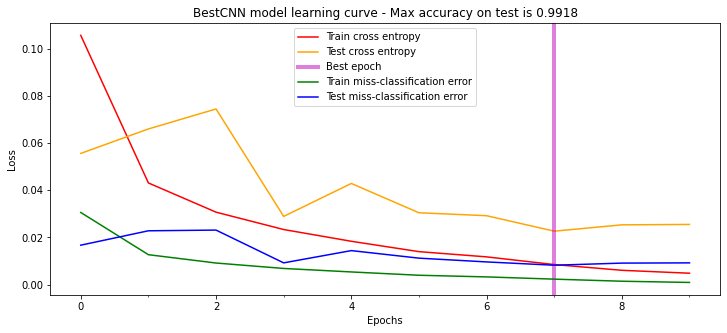

lr:  0.2 & momentum:  0.5


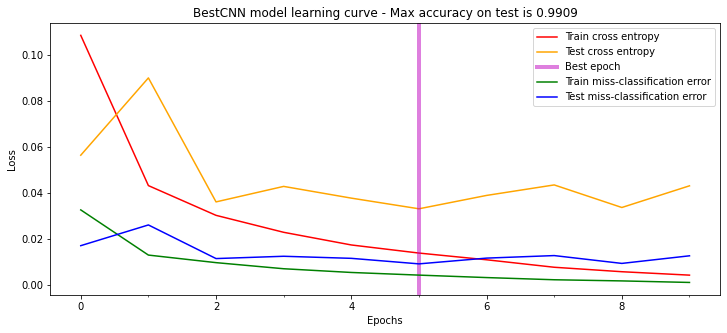

lr:  0.2 & momentum:  0.9


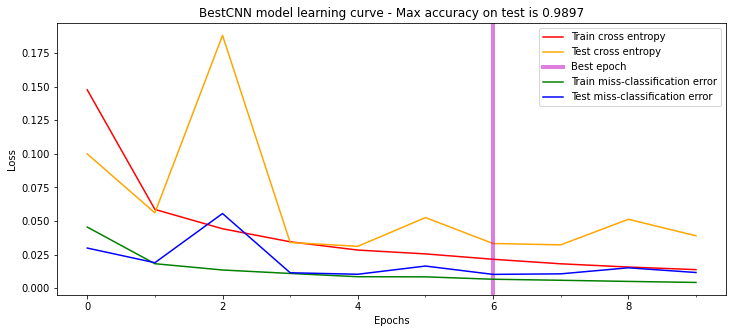

lr:  0.5 & momentum:  0.0


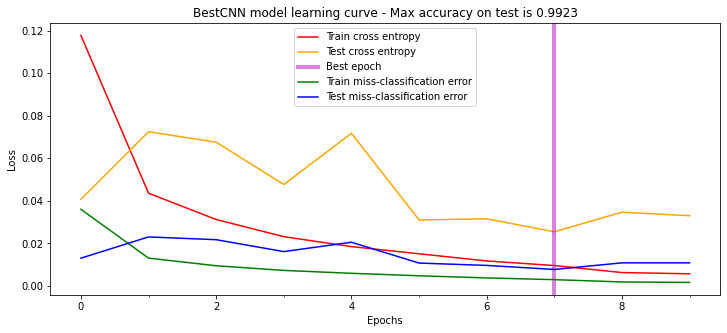

lr:  0.5 & momentum:  0.5


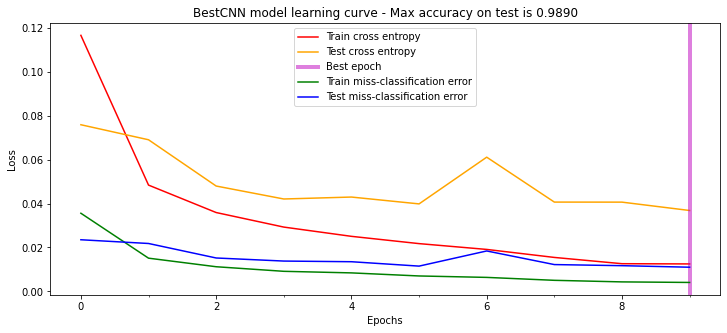

lr:  0.5 & momentum:  0.9


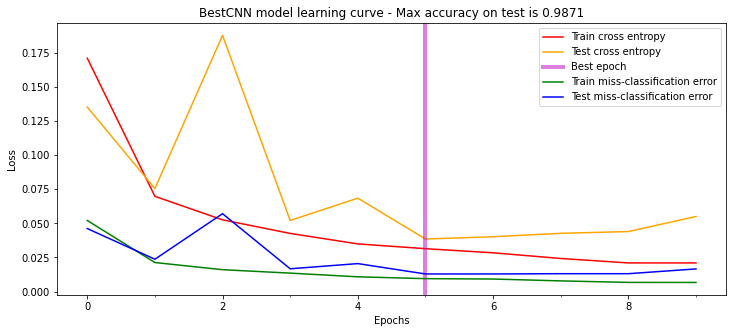

In [47]:
model_name = 'BestCNN'
for i in lr:
  for j in momentum:
    history = np.load('test_lr:'+str(i)+'m:' + str(j)+'.npy',allow_pickle='TRUE').item()
    print('lr: ', i,'& momentum: ',j)
    plot_history(history, model_name)

In [54]:
def tuneacc(lr,momentum):
  tune_accu = []
  for i in lr:
      for j in momentum:
        tunehistory = np.load('test_lr:'+str(i)+'m:' + str(j)+'.npy',allow_pickle='TRUE').item()
        tune_accu.append(100*(1-max(tunehistory['val_accuracy'])))
  return tune_accu

a = tuneacc(lr,momentum)
misclass = [a[i:i+3] for i in range(0,len(a), 3)]

df_misclass = pd.DataFrame(misclass,columns = [momentum[0],momentum[1],momentum[2]], 
                      index = [lr[0],lr[1],lr[2], lr[3]])
df_misclass.index.name = 'Learning Rate'
df_misclass.columns.name = 'Momentum'
df_misclass.style.set_precision(5).highlight_min(color = 'lightpink').set_caption("Min Misclassification error in percentage(%)")

Momentum,0.0,0.5,0.9
Learning Rate,,,
0.1,0.84000,0.83000,1.10000
0.01,1.36000,1.17000,0.86000
0.2,0.82000,0.91000,1.03000
0.5,0.77000,1.10000,1.29000


In [53]:
def tuneacc(lr,momentum):
  tune_accu = []
  for i in lr:
      for j in momentum:
        tunehistory = np.load('test_lr:'+str(i)+'m:' + str(j)+'.npy',allow_pickle='TRUE').item()
        tune_accu.append(100*(1-np.mean(tunehistory['val_accuracy'])))
  return tune_accu

a = tuneacc(lr,momentum)
misclass = [a[i:i+3] for i in range(0,len(a), 3)]

df_misclass = pd.DataFrame(misclass,columns = [momentum[0],momentum[1],momentum[2]], 
                      index = [lr[0],lr[1],lr[2], lr[3]])
df_misclass.index.name = 'Learning Rate'
df_misclass.columns.name = 'Momentum'
df_misclass.style.set_precision(5).highlight_min(color = 'lightpink').set_caption("Mean Misclassification error in percentage(%)")

Momentum,0.0,0.5,0.9
Learning Rate,,,
0.1,1.47300,1.33500,1.68900
0.01,2.06400,1.60700,1.31600
0.2,1.33500,1.33600,1.90800
0.5,1.43900,1.52600,2.32800
